# IF-1018 Minería de Datos 

- Versiones de librerías, python 3.9

- numpy 1.20.3
- sklearn 1.0.2
- matplotlib 3.5.2
- scipy 1.8.0

In [1]:
#Importar las librerías necesarias
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

In [22]:
# Cargar y preparar los datos
# Cargamos el dataset Iris, que contiene medidas de diferentes especies de flores
iris = load_iris()
X = iris.data    # Características: longitud y ancho de sépalos y pétalos
y = iris.target  # Etiquetas: especies de iris (setosa, versicolor, virginica)

# Dividimos los datos en conjuntos de entrenamiento y prueba
# test_size=0.3 significa que el 30% de los datos se usarán para pruebas
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [23]:
# Creamos un clasificador de árbol de decisión con parámetros específicos
clf = DecisionTreeClassifier(
    criterion='gini',    # Criterio para medir la calidad de una división
    max_depth=5,         # Profundidad máxima del árbol
    random_state=42      # Semilla para reproducibilidad
)

# Entrenamos el modelo con los datos de entrenamiento
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [24]:
# Calculamos la precisión del modelo en los datos de prueba
score = clf.score(X_test, y_test)
print(f"Precisión del modelo: {score * 100:.2f}%")

Precisión del modelo: 100.00%


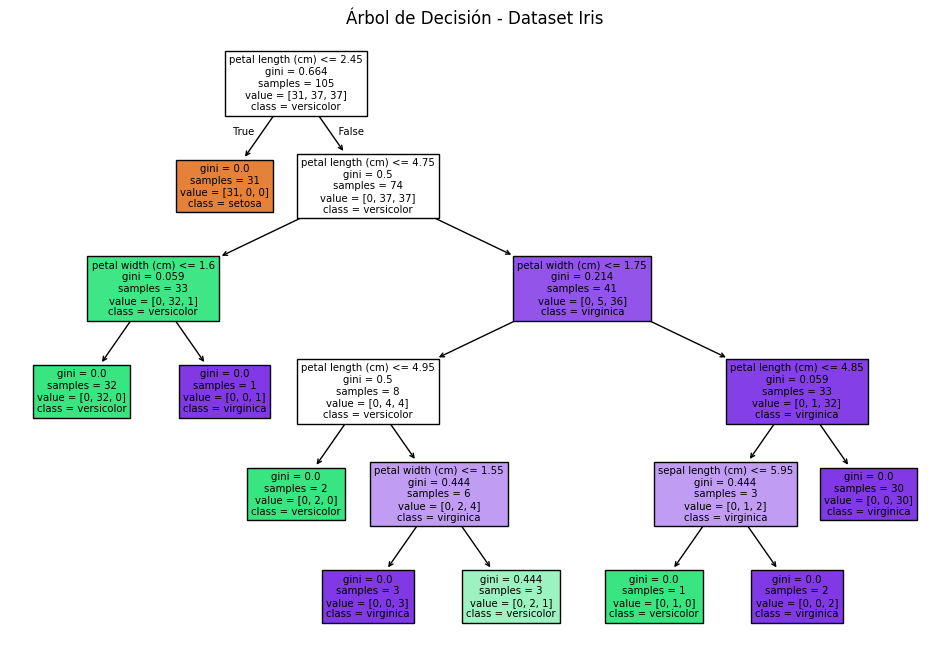

In [25]:
plt.figure(figsize=(12,8))
tree.plot_tree(clf, 
               feature_names=iris.feature_names,    # Nombres de las características
               class_names=iris.target_names,       # Nombres de las clases
               filled=True)                         # Colorear nodos por clase
plt.title("Árbol de Decisión - Dataset Iris")
plt.show()

In [26]:
# Hacemos predicciones usando el conjunto de prueba
y_pred = clf.predict(X_test)

# Comparamos las predicciones con las etiquetas reales
print("\nComparación de predicciones:")
print("Predicciones:", y_pred)
print("Etiquetas Reales:", y_test)


Comparación de predicciones:
Predicciones: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]
Etiquetas Reales: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]


In [27]:
from sklearn.metrics import classification_report

# Generar un reporte detallado
report = classification_report(y_test, y_pred, target_names=iris.target_names)
print(report)


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



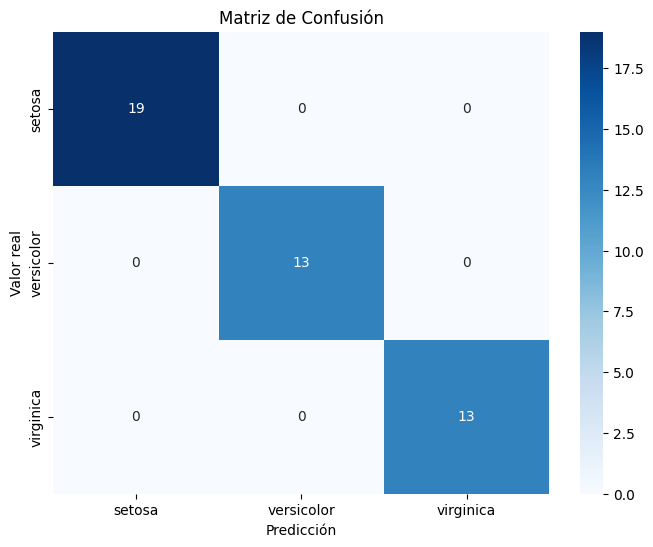

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generar la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión con un mapa de calor
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.title('Matriz de Confusión')
plt.show()


In [31]:
# Creamos una nueva muestra con medidas específicas

# Medidas: [sepal length, sepal width, petal length, petal width]
nueva_muestra = [[5.0, 3.6, 2.5, 0.2]]  
prediccion = clf.predict(nueva_muestra)
print(f"\nPredicción para nueva muestra: {iris.target_names[prediccion[0]]}")


Predicción para nueva muestra: versicolor


### Comparaciones

1. Comparación de criterion:


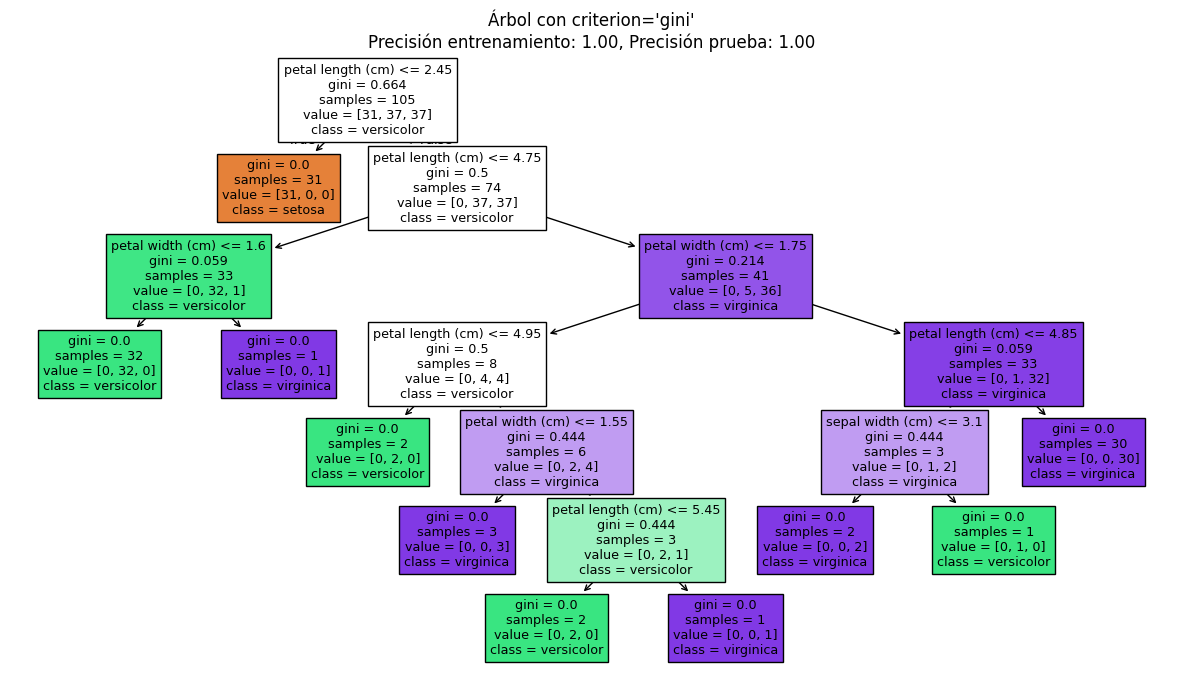

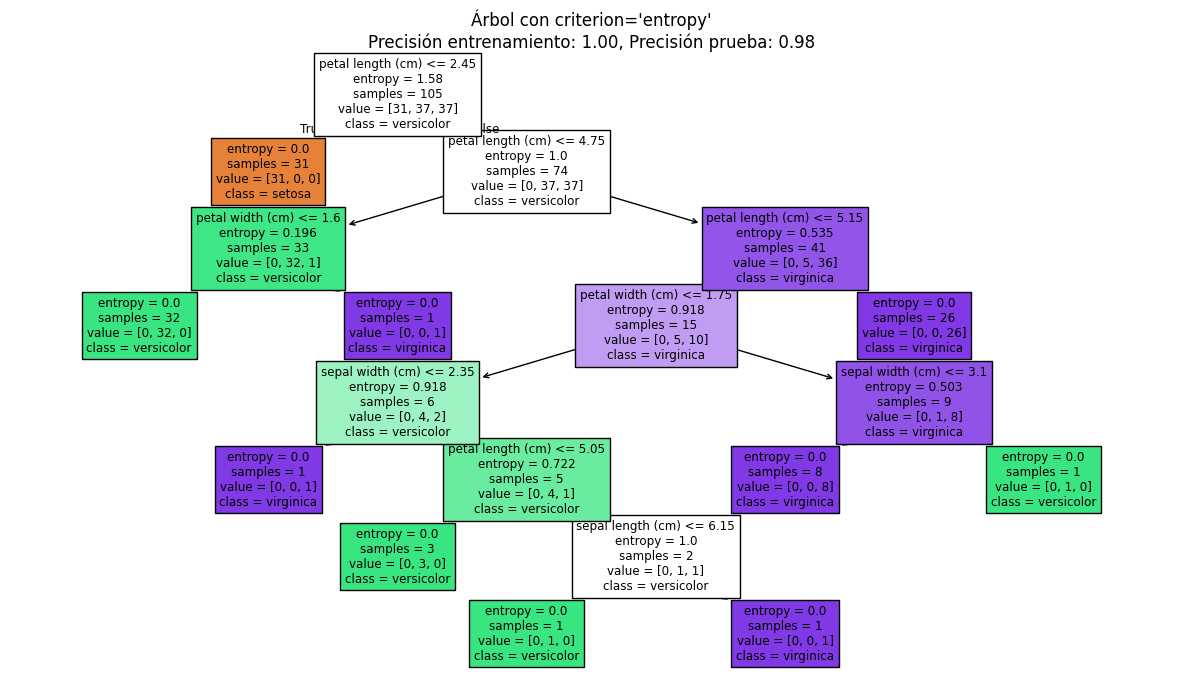


2. Comparación de max_depth:


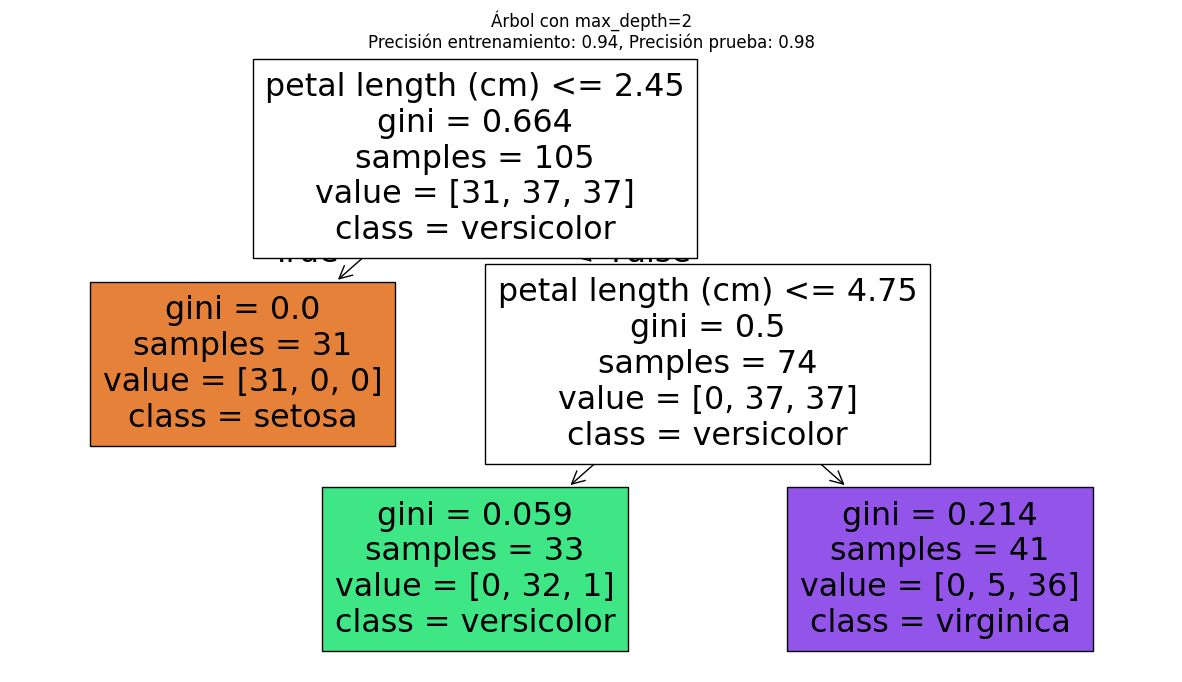

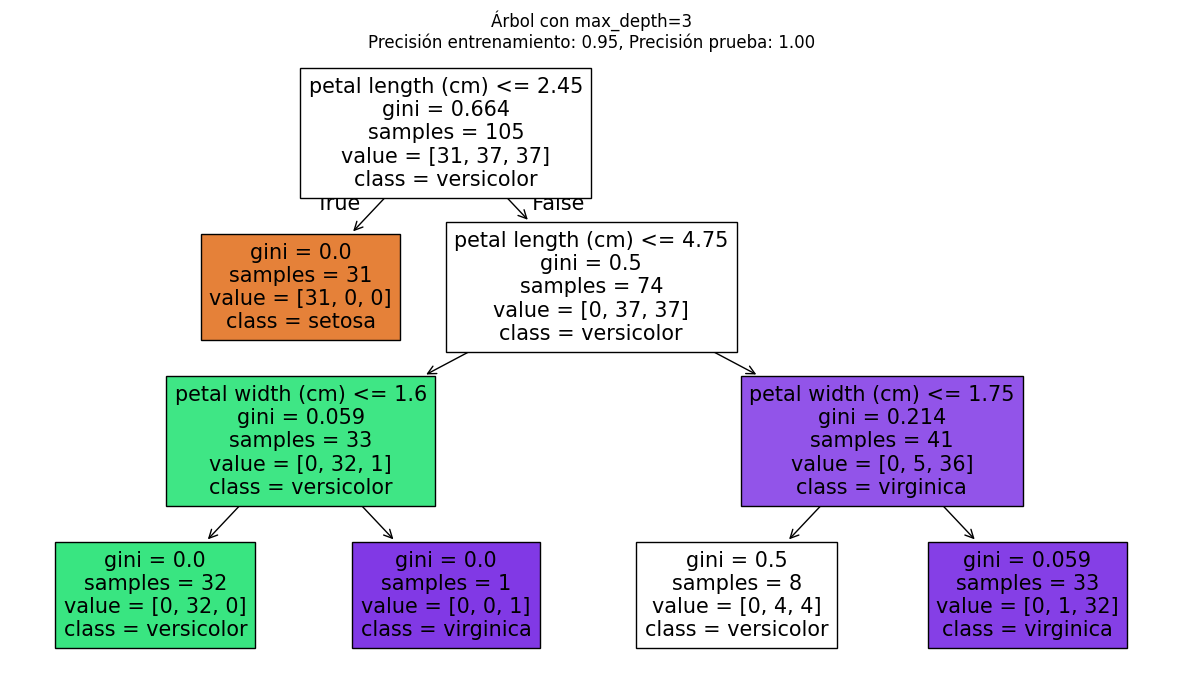

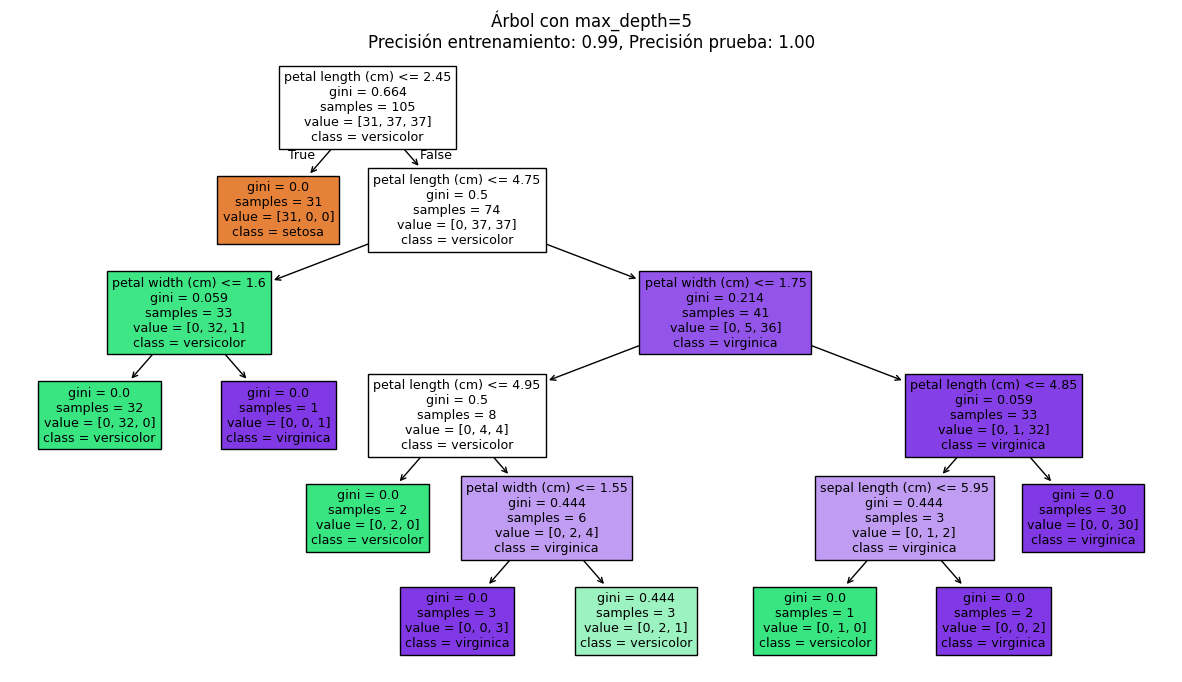

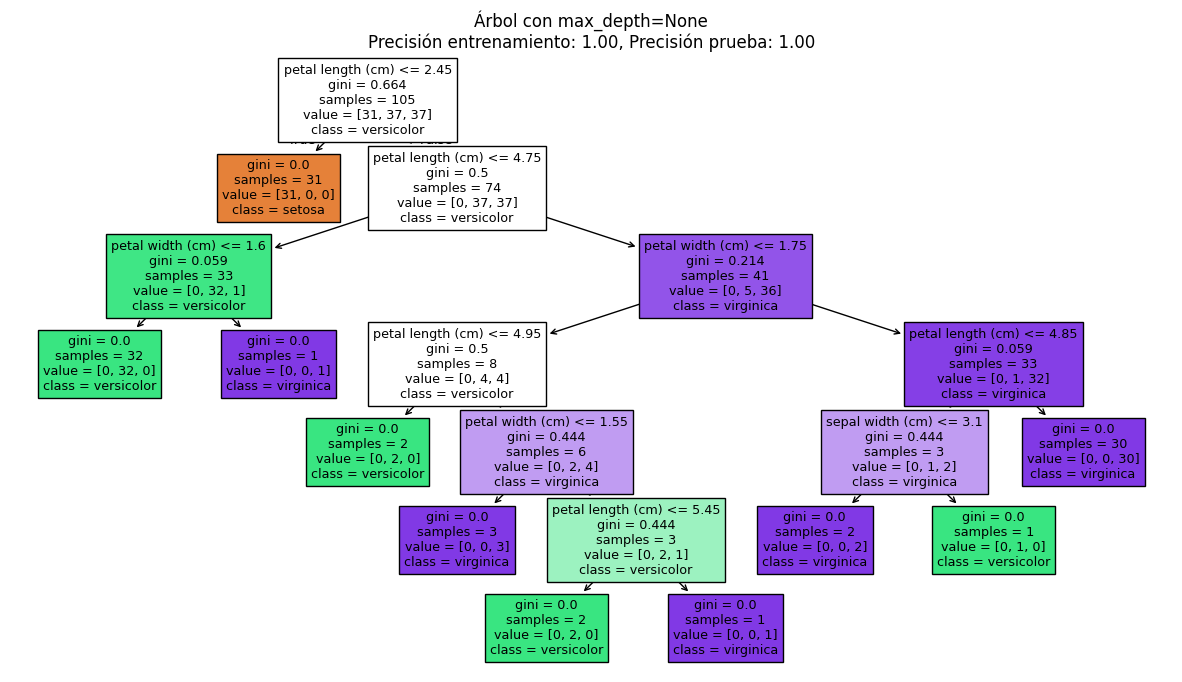


3. Comparación de min_samples_split:


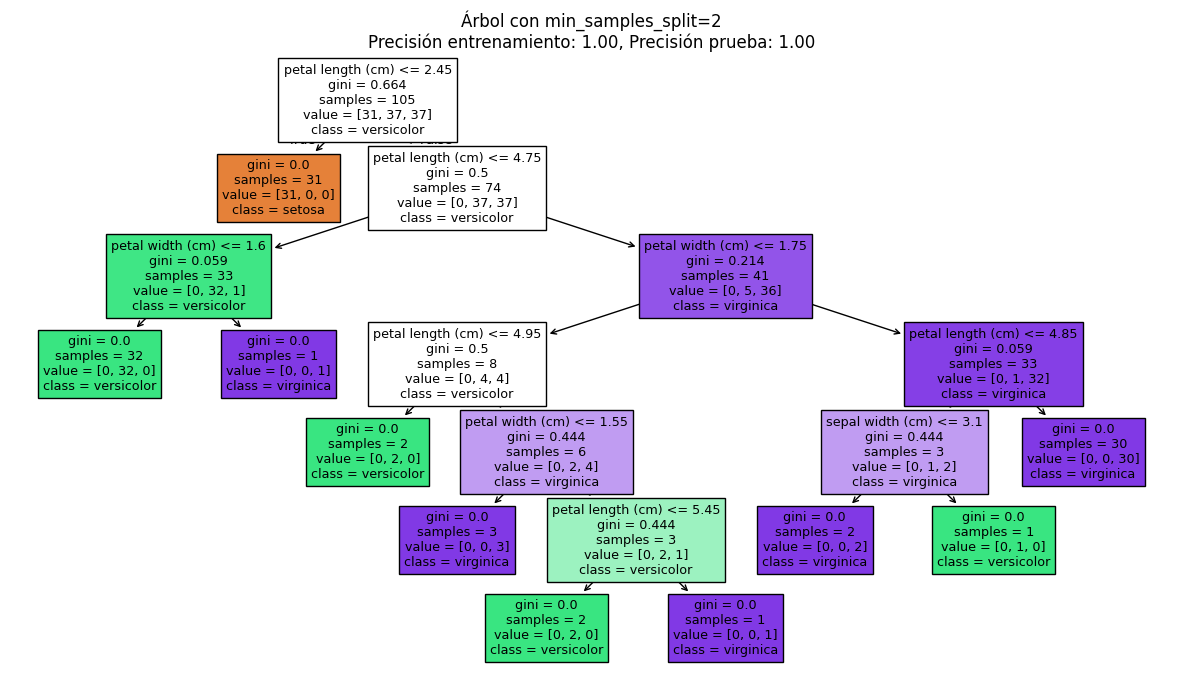

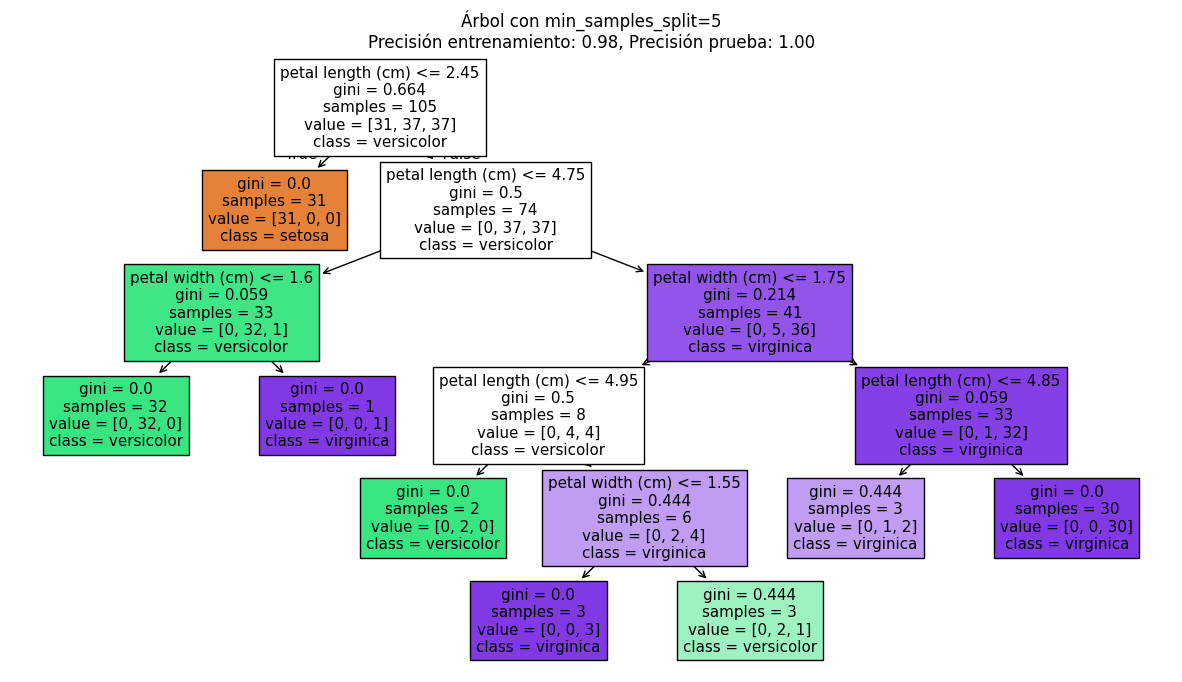

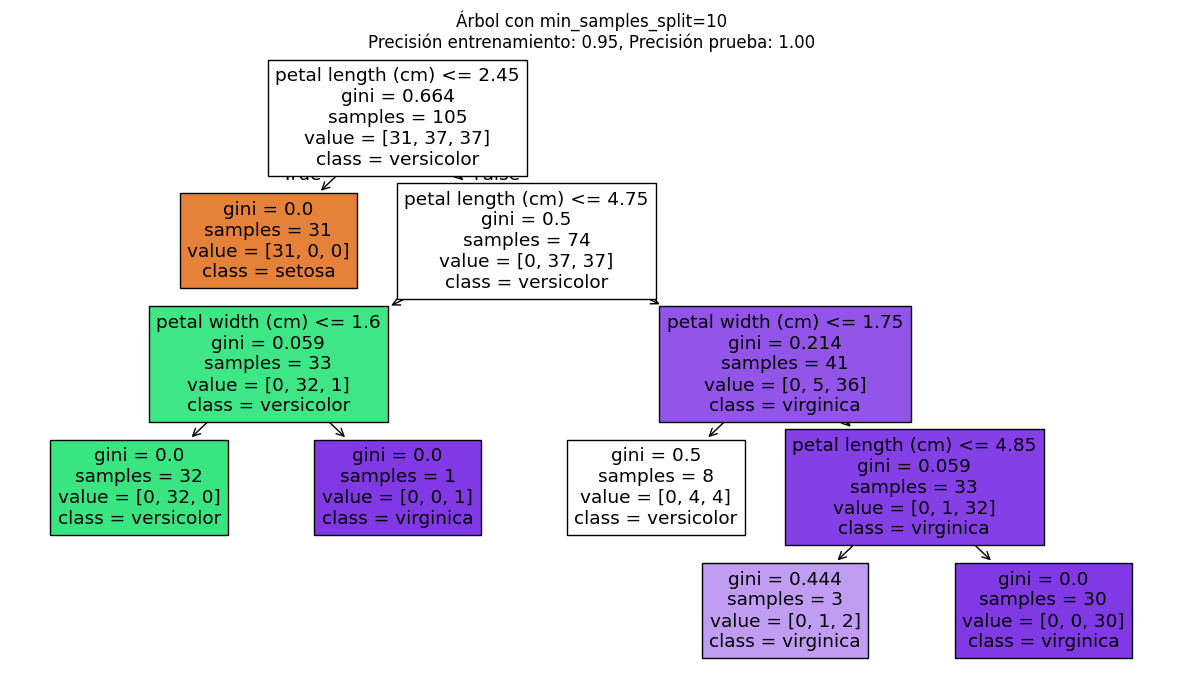


4. Comparación de class_weight:


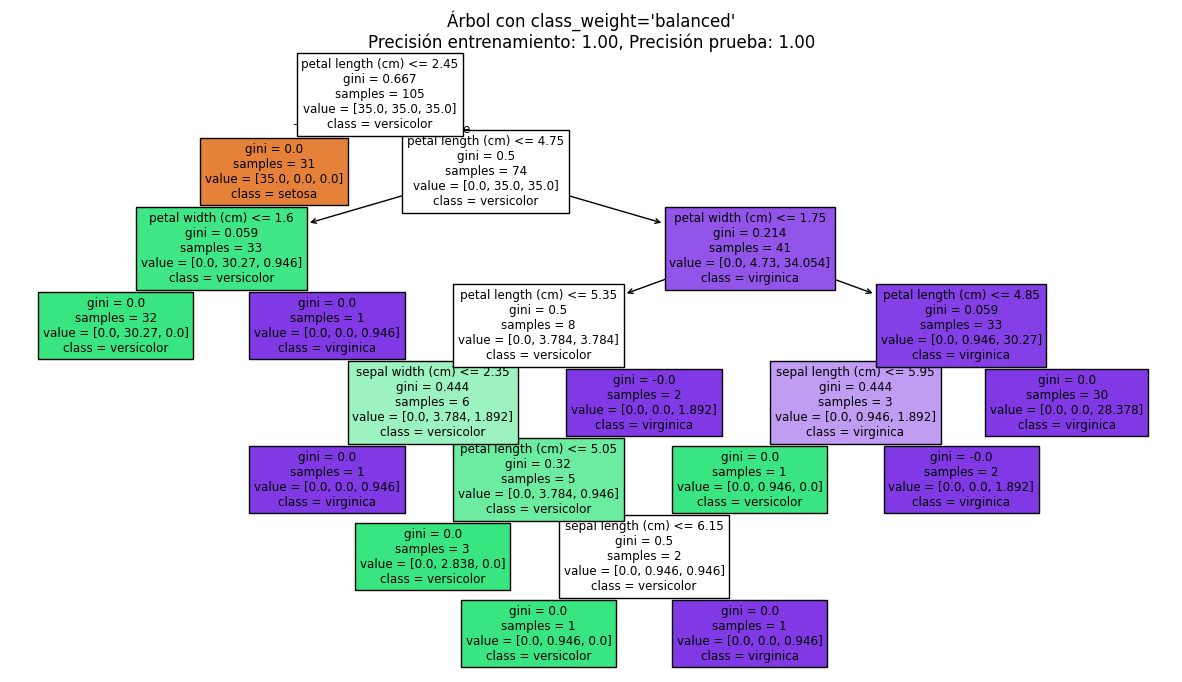


Resumen de resultados:
               Parámetro  Precisión Entrenamiento  Precisión Prueba
0                   Gini                 1.000000          1.000000
1                Entropy                 1.000000          0.977778
2            max_depth=2                 0.942857          0.977778
3            max_depth=3                 0.952381          1.000000
4            max_depth=5                 0.990476          1.000000
5         max_depth=None                 1.000000          1.000000
6    min_samples_split=2                 1.000000          1.000000
7    min_samples_split=5                 0.980952          1.000000
8   min_samples_split=10                 0.952381          1.000000
9  class_weight=balanced                 1.000000          1.000000

Predicciones para nueva muestra con diferentes configuraciones:
Gini: setosa
Entropy: setosa
max_depth=2: setosa
max_depth=3: setosa
max_depth=5: setosa
max_depth=None: setosa
min_samples_split=2: setosa
min_samples_split=5: se

In [21]:
# Tutorial de Parámetros de Árbol de Decisión
# Este script demuestra el impacto de diferentes parámetros en un árbol de decisión

# Importar las librerías necesarias
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Cargar y preparar los datos
iris = load_iris()
X = iris.data
y = iris.target

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

def entrenar_y_evaluar(params, titulo):
    # Crear y entrenar el modelo con los parámetros especificados
    clf = DecisionTreeClassifier(**params)
    clf.fit(X_train, y_train)
    
    # Evaluar el modelo
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    # Visualizar el árbol
    plt.figure(figsize=(15,8))
    tree.plot_tree(clf, feature_names=iris.feature_names, 
                   class_names=iris.target_names, filled=True)
    plt.title(f"{titulo}\nPrecisión entrenamiento: {train_score:.2f}, Precisión prueba: {test_score:.2f}")
    plt.show()
    
    return train_score, test_score

# 1. Demostración de criterion (gini vs entropy)
params_gini = {'criterion': 'gini', 'random_state': 42}
params_entropy = {'criterion': 'entropy', 'random_state': 42}

print("1. Comparación de criterion:")
gini_scores = entrenar_y_evaluar(params_gini, "Árbol con criterion='gini'")
entropy_scores = entrenar_y_evaluar(params_entropy, "Árbol con criterion='entropy'")

# 2. Demostración de max_depth
depths = [2, 3, 5, None]
depth_scores = []

print("\n2. Comparación de max_depth:")
for depth in depths:
    params = {'max_depth': depth, 'random_state': 42}
    scores = entrenar_y_evaluar(params, f"Árbol con max_depth={depth}")
    depth_scores.append(scores)

# 3. Demostración de min_samples_split
splits = [2, 5, 10]
split_scores = []

print("\n3. Comparación de min_samples_split:")
for split in splits:
    params = {'min_samples_split': split, 'random_state': 42}
    scores = entrenar_y_evaluar(params, f"Árbol con min_samples_split={split}")
    split_scores.append(scores)

# 4. Demostración de class_weight
print("\n4. Comparación de class_weight:")
params_balanced = {'class_weight': 'balanced', 'random_state': 42}
balanced_scores = entrenar_y_evaluar(params_balanced, "Árbol con class_weight='balanced'")

# Crear un DataFrame con todos los resultados
resultados = pd.DataFrame({
    'Parámetro': ['Gini', 'Entropy'] + 
                 [f'max_depth={d}' for d in depths] +
                 [f'min_samples_split={s}' for s in splits] +
                 ['class_weight=balanced'],
    'Precisión Entrenamiento': [gini_scores[0], entropy_scores[0]] +
                              [score[0] for score in depth_scores] +
                              [score[0] for score in split_scores] +
                              [balanced_scores[0]],
    'Precisión Prueba': [gini_scores[1], entropy_scores[1]] +
                        [score[1] for score in depth_scores] +
                        [score[1] for score in split_scores] +
                        [balanced_scores[1]]
})

print("\nResumen de resultados:")
print(resultados)

# Bonus: Ejemplo de predicción con diferentes configuraciones
nueva_muestra = [[5.0, 3.6, 1.4, 0.2]]  # Una nueva flor para predecir

print("\nPredicciones para nueva muestra con diferentes configuraciones:")
for index, row in resultados.iterrows():
    param_name = row['Parámetro']
    if param_name.startswith('max_depth'):
        depth = int(param_name.split('=')[1]) if 'None' not in param_name else None
        clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    elif param_name.startswith('min_samples_split'):
        split = int(param_name.split('=')[1])
        clf = DecisionTreeClassifier(min_samples_split=split, random_state=42)
    elif param_name == 'Gini':
        clf = DecisionTreeClassifier(criterion='gini', random_state=42)
    elif param_name == 'Entropy':
        clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
    elif param_name == 'class_weight=balanced':
        clf = DecisionTreeClassifier(class_weight='balanced', random_state=42)
    
    clf.fit(X_train, y_train)
    prediccion = clf.predict(nueva_muestra)
    print(f"{param_name}: {iris.target_names[prediccion[0]]}")

### Codigo completo

In [ ]:
# Árbol de Decisión con Dataset Iris
# Este notebook demuestra cómo crear, entrenar y visualizar un árbol de decisión
# usando el conjunto de datos Iris.

# Paso 0: Importar las librerías necesarias
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# Paso 1: Cargar y preparar los datos
# Cargamos el dataset Iris, que contiene medidas de diferentes especies de flores
iris = load_iris()
X = iris.data    # Características: longitud y ancho de sépalos y pétalos
y = iris.target  # Etiquetas: especies de iris (setosa, versicolor, virginica)

# Dividimos los datos en conjuntos de entrenamiento y prueba
# test_size=0.3 significa que el 30% de los datos se usarán para pruebas
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Paso 2: Crear y entrenar el modelo
# Creamos un clasificador de árbol de decisión con parámetros específicos
clf = DecisionTreeClassifier(
    criterion='gini',    # Criterio para medir la calidad de una división
    max_depth=3,         # Profundidad máxima del árbol
    random_state=42      # Semilla para reproducibilidad
)

# Entrenamos el modelo con los datos de entrenamiento
clf.fit(X_train, y_train)

# Paso 3: Evaluar el modelo
# Calculamos la precisión del modelo en los datos de prueba
score = clf.score(X_test, y_test)
print(f"Precisión del modelo: {score * 100:.2f}%")

# Paso 4: Visualizar el árbol de decisión
plt.figure(figsize=(12,8))
tree.plot_tree(clf, 
               feature_names=iris.feature_names,    # Nombres de las características
               class_names=iris.target_names,       # Nombres de las clases
               filled=True)                         # Colorear nodos por clase
plt.title("Árbol de Decisión - Dataset Iris")
plt.show()

# Paso 5: Realizar predicciones
# Hacemos predicciones usando el conjunto de prueba
y_pred = clf.predict(X_test)

# Comparamos las predicciones con las etiquetas reales
print("\nComparación de predicciones:")
print("Predicciones:", y_pred)
print("Etiquetas Reales:", y_test)

# Bonus: Ejemplo de predicción con una nueva muestra
# Creamos una nueva muestra con medidas específicas
nueva_muestra = [[5.0, 3.6, 1.4, 0.2]]  # Medidas: [sepal length, sepal width, petal length, petal width]
prediccion = clf.predict(nueva_muestra)
print(f"\nPredicción para nueva muestra: {iris.target_names[prediccion[0]]}")